# Evaluating classification models on Yale B dataset 

## Prepare data

In [1]:
# obtain the data
from numpy import load

y = load('yaleExtB_target.npy')
X = load('yaleExtB_data.npy')

In [2]:
from sklearn.model_selection import train_test_split

# split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33,
                                                    shuffle=True)

In [3]:
from sklearn.decomposition import PCA

# PCA 
nof_prin_components = 200  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

## MLP classifier and evaluation

In [4]:
# MLP classifier

from sklearn.neural_network import MLPClassifier

# train a neural network
nohn = 200 # nof hidden neurons
print("Fitting the classifier to the training set")
mlp = MLPClassifier(hidden_layer_sizes=(nohn,), 
                    solver='sgd', 
                    activation='tanh', 
                    batch_size=256, 
                    early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set


In [5]:
y_pred = mlp.predict(X_test_pca) # reoognises the test images 

In [29]:
# comparing the results in tabular format

import pandas as pd

# setting pandas options to display more data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 10)

data = {'target':y_test}

worksheet = pd.DataFrame(data)

worksheet['mlp_y_pred'] = y_pred

print(worksheet)

     target  mlp_y_pred
0      25.0        25.0
1      17.0        17.0
2       5.0         5.0
3      37.0        37.0
4       4.0         4.0
5      35.0        35.0
6       8.0         8.0
7       2.0         2.0
8       6.0         6.0
9      13.0        15.0
10     33.0        33.0
11      3.0         3.0
12     20.0        20.0
13     16.0        16.0
14     34.0        13.0
15     25.0        25.0
16      9.0         9.0
17     20.0        20.0
18     35.0        35.0
19     34.0        34.0
20     11.0        11.0
21      5.0         5.0
22      8.0         8.0
23     27.0        27.0
24     37.0        37.0
25      8.0         8.0
26      4.0        16.0
27      5.0         5.0
28     37.0        37.0
29     12.0        12.0
30      8.0         8.0
31      9.0         9.0
32     34.0        34.0
33     11.0        11.0
34     11.0        34.0
35     34.0        34.0
36      4.0         4.0
37     37.0        37.0
38     32.0        32.0
39     15.0        15.0
40      3.0     

### Accuracy measures for MLP

In [10]:
from sklearn.metrics import classification_report

# precision, recall, f1-score and support for the scores
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         2.0       0.75      0.64      0.69        14
         3.0       0.75      0.75      0.75        16
         4.0       0.50      0.73      0.59        11
         5.0       0.86      0.80      0.83        15
         6.0       0.75      0.80      0.77        15
         7.0       0.89      0.44      0.59        18
         8.0       0.62      1.00      0.77        15
         9.0       0.71      0.80      0.75        15
        11.0       0.68      0.81      0.74        16
        12.0       0.74      0.93      0.82        15
        13.0       0.67      0.40      0.50        20
        15.0       0.67      0.92      0.77        13
        16.0       0.68      0.71      0.70        21
        17.0       0.86      0.67      0.75        18
        18.0       0.70      0.67      0.68        21
        20.0       0.58      0.74      0.65        19
        22.0       0.53      0.42      0.47        19
        23.0       0.67    

In [31]:
# cross validation
import numpy as np
from sklearn.model_selection import cross_val_score

# Just for demonstration purpose
# For accurate prediction, make sure PCA of all input data are passed
X_pca = pca.transform(X)
cross_val_result = cross_val_score(mlp, X_pca, y, cv=4)

print("MLP cross validation scores", cross_val_result)
print("MLP cross validation average accuracy", 
      np.mean(cross_val_result))

MLP cross validation scores [0.872      0.48       0.55733333 0.37333333]
MLP cross validation average accuracy 0.5706666666666667


In [14]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  1  0  0  0
   0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  0  0  0
   0  0  1  0  0  0]
 [ 0  0  8  0  0  0  1  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  2 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0  0  0  0]
 [ 0  0  1  0 12  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  1  0  0  0  0]
 [ 0  0  2  0  0  8  0  0  0  0  0  0  5  1  0  2  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0
   0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1  2  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  2  8  4  0  0  2  0 

Text(0.5, 1.0, 'Confusion Matrix')

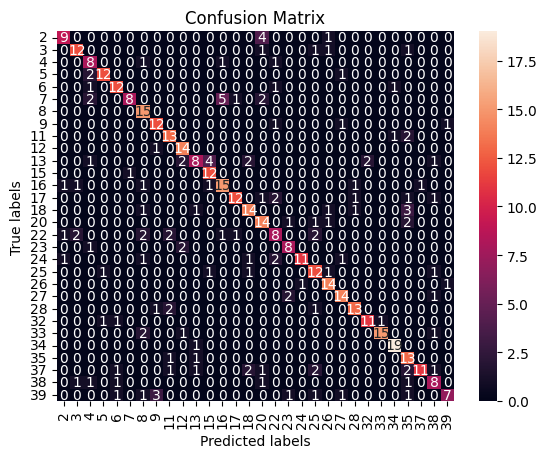

In [34]:
# confusion matrix as a heatmap using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

classes = np.unique(y_test)
xticklabels = classes.astype(int).astype(str).tolist()
yticklabels = classes.astype(int).astype(str).tolist()

ax= plt.subplot()

# annot=True to annotate cells, 
# ftm='g' to disable scientific notation
sns.heatmap(cm, 
            annot=True, fmt='g', ax=ax, 
            xticklabels=xticklabels, 
            yticklabels=yticklabels);  

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [21]:
# Preparing data for ROC curve display

y_score = mlp.fit(X_train_pca, y_train).predict_proba(X_test_pca)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
print('Test shape', y_onehot_test.shape)  # (n_samples, n_classes)

class_of_interest = 39.0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
print('Corresponding class id', class_id)

Test shape (495, 30)
Corresponding class id 29


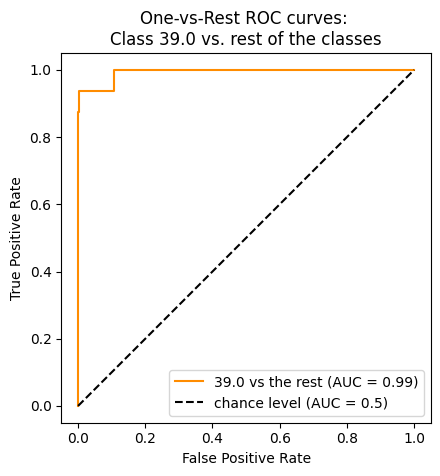

In [35]:
# ROC curve for one class
# Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"One-vs-Rest ROC curves: \nClass {class_of_interest} vs. rest of the classes")
plt.legend()
plt.show()

In [36]:
# ROC AUC score

from sklearn.metrics import roc_auc_score

roc_auc_score(y_onehot_test[:, class_id],
              y_score[:, class_id])

0.9930845511482255

## Evaluation of AdaBoost classifier on Yale B data